In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
trust_rate_file_path = '../Resources/global_trust-rate.csv'
trust_survey_file_path = '../Resources/global_trust-survey.csv'

trust_rate_df = pd.read_csv(trust_rate_file_path)
trust_survey_df = pd.read_csv(trust_survey_file_path)

In [33]:
# Replace all occurrences of 99 with 5 in trust_survey_df
trust_survey_df.replace(99, 5, inplace=True)

In [34]:
# Display basic info for both datasets
print("Trust Rate Dataset Info:")
print(trust_rate_df.info())
print("\nTrust Survey Dataset Info:")
print(trust_survey_df.info())

Trust Rate Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              113 non-null    object 
 1   neighbourhood        113 non-null    float64
 2   government           113 non-null    float64
 3   scientist            113 non-null    float64
 4   journalist           113 non-null    float64
 5   doctor_and_nurses    113 non-null    float64
 6   philantropist        113 non-null    float64
 7   traditional_healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB
None

Trust Survey Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119088 entries, 0 to 119087
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              119088 non-null  object
 1   id                   

Step 1: Data Cleaning

In [35]:
# Handle missing values in trust_rate_df
numeric_columns = trust_rate_df.select_dtypes(include=['number']).columns
trust_rate_df[numeric_columns] = trust_rate_df[numeric_columns].fillna(trust_rate_df[numeric_columns].mean())

# Standardize column names to align both datasets
trust_rate_df.columns = trust_rate_df.columns.str.strip().str.lower().str.replace(' ', '_')
trust_survey_df.columns = trust_survey_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verify consistency of country names
countries_in_rate = set(trust_rate_df['country'])
countries_in_survey = set(trust_survey_df['country'])
mismatched_countries = countries_in_rate.symmetric_difference(countries_in_survey)
print("\nMismatched countries between datasets:", mismatched_countries)


Mismatched countries between datasets: set()


In [36]:
trust_rate_df.head()

,country,neighbourhood,government,scientist,journalist,doctor_and_nurses,philantropist,traditional_healers
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15


In [37]:
trust_survey_df.head()

,country,id,neighbourhood,government,scientist,journalist,doctor_and_nurses,philantropist,traditional_healers
0,United States,178216898,2,4,2,4,2,2,2
1,United States,159107018,4,2,1,2,1,2,2
2,United States,203166417,2,3,1,1,1,3,4
3,United States,201061719,2,4,1,2,2,2,2
4,United States,195404162,4,4,1,1,1,2,1


Step 2: Data Visualization

c:\Users\jayne\anaconda3\envs\my_env\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


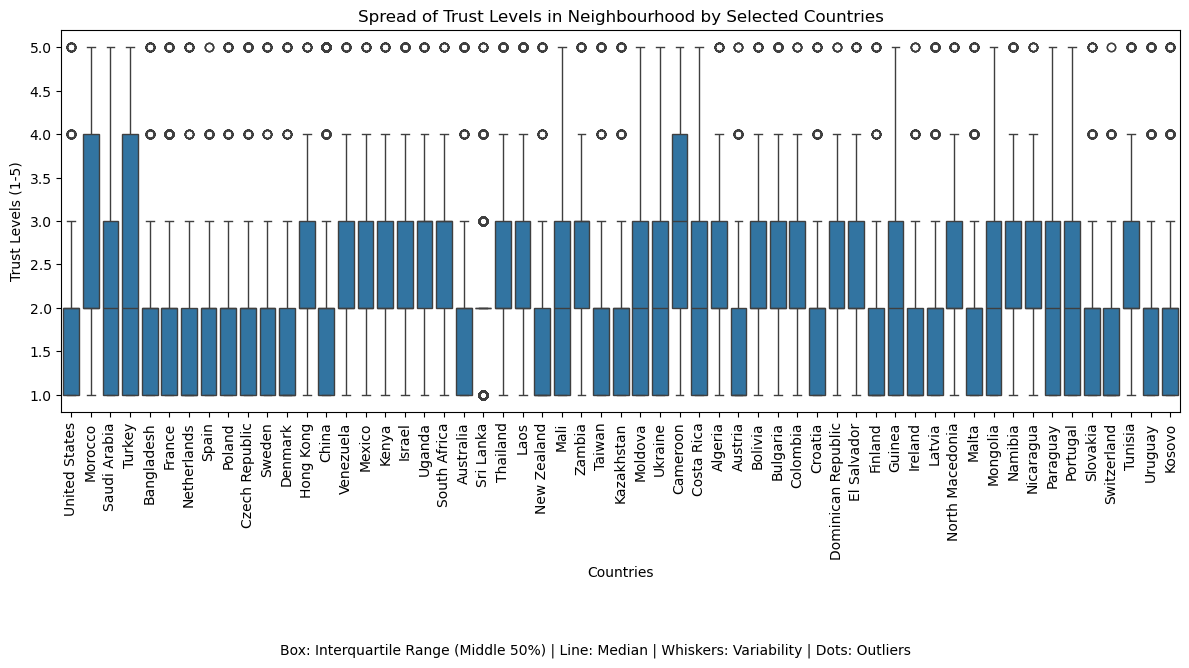

In [49]:
#BoxPlot
sampled_countries = trust_survey_df['country'].unique()[::2]  # Take every second country
filtered_survey_df = trust_survey_df[trust_survey_df['country'].isin(sampled_countries)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_survey_df, x='country', y='neighbourhood')
plt.xticks(rotation=90)
plt.title('Spread of Trust Levels in Neighbourhood by Selected Countries')
plt.xlabel('Countries')
plt.ylabel('Trust Levels (1-5)')
plt.figtext(0.5, -0.1, 'Box: Interquartile Range (Middle 50%) | Line: Median | Whiskers: Variability | Dots: Outliers', ha='center', fontsize=10, wrap=True)
plt.tight_layout()
plt.show()

In [41]:
# Save cleaned datasets
trust_rate_df.to_csv('../Resources/cleaned_trust_rate.csv', index=False)
trust_survey_df.to_csv('../Resources/cleaned_trust_survey.csv', index=False)